In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics
import gdown

from IPython.display import display

In [2]:
import os
os.environ["PracticeMood"] = "Готов работать"

In [3]:
# с помощью `!` можем работать с консолью напрямую из ноутбука
!echo $PracticeMood

Готов работать


# Знакомство с numpy.

NumPy — это библиотека для эффективной работы с массивами любого размера. Она достигает высокой производительности, потому что написана частично на C, где-то есть Fortran.

Основным объектом NumPy является однородный многомерный массив (в numpy называется numpy.ndarray). Это многомерный массив элементов (обычно чисел), одного типа.


## В чем разница между списком Python и массивом NumPy?

NumPy предоставляет вам огромный выбор быстрых и эффективных способов создания массивов и манипулирования числовыми данными внутри них. Хотя список Python может содержать разные типы данных в одном списке, все элементы в массиве NumPy должны быть однородными. Математические операции, предназначенные для выполнения над массивами, были бы крайне неэффективны, если бы массивы не были однородными.

In [4]:
# Создание одномерного массива
a = np.array([1, 2, 3, 4, 5])
print("Одномерный массив:", a)

# Создание двумерного массива (матрицы)
A = np.array([[1, 2, 3], [4, 5, 6]])
print("Двумерный массив:\n", A)

Одномерный массив: [1 2 3 4 5]
Двумерный массив:
 [[1 2 3]
 [4 5 6]]


In [5]:
print("Форма arr1:", a.shape)  # (5,)
print("Форма arr2:", A.shape)  # (2, 3)
print("Размер arr2:", A.size)  # 6 = (2*3)

Форма arr1: (5,)
Форма arr2: (2, 3)
Размер arr2: 6


In [6]:
A = np.random.random((3, 3))
det_A = np.linalg.det(A)
print("\nОпределитель матрицы A:", det_A)


det_A_t = np.linalg.det(A.T)
print("\nОпределитель транспонированной матрицы A:", det_A)

inv_A = np.linalg.inv(A)
print("\nОбратная матрица A:\n", inv_A)

# Проверка, что произведение A и inv_A дает единичную матрицу
identity_matrix = np.dot(A, inv_A)


Определитель матрицы A: 0.11719104236288203

Определитель транспонированной матрицы A: 0.11719104236288203

Обратная матрица A:
 [[-0.68481856  0.48518991  1.3223662 ]
 [ 4.56678249 -5.47691643  0.01431501]
 [-2.51820972  4.78732426 -1.41290002]]


Реализуйте три функции: для вычисления MSE, косинусного расстояния и бинарной кросс-энтропии с использованием NumPy.

In [7]:
# Формула MSE: MSE = (1/n) * Σ(y_true - y_pred)^2
def calculate_mse(y_true, y_pred):
    # Ваш код здесь
    mse = np.mean((y_true - y_pred) ** 2)
    return mse


# Формула косинусного расстояния: cosine_distance = 1 - (a·b) / (||a|| * ||b||)
def calculate_cosine_distance(a, b):
    # Ваш код здесь
    dot_product = np.dot(a, b)
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)
    cosine_similarity = dot_product / (norm_a * norm_b)
    cosine_distance = 1 - cosine_similarity
    return cosine_distance


# Формула BCE: BCE = -1/n * Σ[y_true * log(y_pred) + (1 - y_true) * log(1 - y_pred)]
def calculate_bce(y_true, y_pred):
    # Ваш код здесь
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    bce = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return bce


Сравниваем с методами из sklearn.

In [8]:
def test_calculate_mse():
    # Пример данных
    y_true = np.random.random(4)
    y_pred = np.random.random(4)

    # Ожидаемый результат
    expected_mse = sklearn.metrics.mean_squared_error(y_true, y_pred)

    # Вызов функции и проверка
    mse_result = calculate_mse(y_true, y_pred)
    assert np.isclose(mse_result, expected_mse), f"Ошибка в calculate_mse: {mse_result} != {expected_mse}"

def test_calculate_cosine_distance():
    # Пример данных
    a = np.array([1, 2, 3])
    b = np.array([4, 5, 6])

    # Ожидаемый результат
    expected_cosine_distance = 1 - sklearn.metrics.pairwise.cosine_similarity(a[np.newaxis, :], b[np.newaxis, :])

    # Вызов функции и проверка
    cosine_distance_result = calculate_cosine_distance(a, b)
    assert np.isclose(cosine_distance_result, expected_cosine_distance, atol=1e-7), f"Ошибка в calculate_cosine_distance: {cosine_distance_result} != {expected_cosine_distance}"

def test_calculate_bce():
    # Пример данных
    y_true_bce = np.array([1, 0, 1, 0])
    y_pred_bce = np.array([0.9, 0.1, 0.8, 0.4])

    # Ожидаемый результат
    expected_bce = sklearn.metrics.log_loss(y_true_bce, y_pred_bce)

    # Вызов функции и проверка
    bce_result = calculate_bce(y_true_bce, y_pred_bce)
    assert np.isclose(bce_result, expected_bce, atol=1e-7), f"Ошибка в calculate_bce: {bce_result} != {expected_bce}"

In [9]:
test_calculate_mse()
print("Тест для calculate_mse пройден.")

test_calculate_cosine_distance()
print("Тест для calculate_cosine_distance пройден.")

test_calculate_bce()
print("Тест для calculate_bce пройден.")

Тест для calculate_mse пройден.
Тест для calculate_cosine_distance пройден.
Тест для calculate_bce пройден.


## Советы и трюки.

Для того, чтобы замерить скорость работы методов можно использовать наручные часы или магические команды.

Для вызова magic commands используется `%`. Для замера времени работы метода достаточно поставить `%time` перед ним.
При работе с циклами можно использовать модуль tqdm.

Если методы задокументированы, то можно посмотреть описание метода путём нажатия ``` Shift + Tab``` (если в Jupyter-e, в Colab наводим мышкой) внутри или с помощью `?`.

In [10]:
y_true = np.random.random(4)
y_pred = np.random.random(4)

%time _ = calculate_mse(y_true, y_pred)
%time _ = sklearn.metrics.mean_squared_error(y_true, y_pred)

CPU times: user 114 µs, sys: 0 ns, total: 114 µs
Wall time: 118 µs
CPU times: user 995 µs, sys: 0 ns, total: 995 µs
Wall time: 1 ms


In [11]:
import time
from tqdm import tqdm
import PIL

for i in tqdm(range(10)):
    if i == 0:
      !wget -q "https://ih1.redbubble.net/image.3090393648.3268/flat,750x1000,075,t.jpg" -O best_meme.jpg -v 0

    if i == 9:
       display(PIL.Image.open("best_meme.jpg").resize((768, 1024)))
    time.sleep(0.1)



  0%|          | 0/10 [00:00<?, ?it/s]

Can't be verbose and quiet at the same time.
Usage: wget [OPTION]... [URL]...


 90%|█████████ | 9/10 [00:01<00:00,  8.55it/s]


FileNotFoundError: [Errno 2] No such file or directory: '/content/best_meme.jpg'

# Знакомство с pandas.

В свободное время листаем документацию: https://pandas.pydata.org/docs/user_guide/index.html

Два класса:

Series — одномерный массив

DataFrame — двумерный массив (таблица) со строками и столбцами.



DataFrame — строко-ориентрированная структура данных, к любой строчке в таблице можно обратиться по индексу (если не задали сами, то он будет создан за вас).

Собираем данные.

In [12]:
df = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.arange(4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"], categories=["train", "test"]),
        "F": "foo",
    },
    index=np.arange(4)[::-1]
)


display(df.head(2) )
display(df.tail(2))

,A,B,C,D,E,F
3,1.0,2013-01-02,1.0,0,test,foo
2,1.0,2013-01-02,1.0,1,train,foo


,A,B,C,D,E,F
1,1.0,2013-01-02,1.0,2,test,foo
0,1.0,2013-01-02,1.0,3,train,foo


In [13]:
# смотрим какие типы данных в таблице
df.dtypes

,0
A,float64
B,datetime64[s]
C,float32
D,int32
E,category
F,object


In [14]:
# быстрые статистики по данным
df.describe()

,A,B,C,D
count,4.0,4,4.0,4.000000
mean,1.0,2013-01-02 00:00:00,1.0,1.500000
min,1.0,2013-01-02 00:00:00,1.0,0.000000
25%,1.0,2013-01-02 00:00:00,1.0,0.750000
50%,1.0,2013-01-02 00:00:00,1.0,1.500000
75%,1.0,2013-01-02 00:00:00,1.0,2.250000
max,1.0,2013-01-02 00:00:00,1.0,3.000000
std,0.0,NaN,0.0,1.290994


In [15]:
# проверяем индекс
display(df.index)

# делаем срез первых элементов (смотрим на порядок не на индекс)
display(df.iloc[np.arange(2)])

# делаем срез первых элементов (смотрим на индекс)
display(df.loc[np.arange(2)])

# делаем срез по колонкам
display(df[["A", "B"]])


Index([3, 2, 1, 0], dtype='int64')

,A,B,C,D,E,F
3,1.0,2013-01-02,1.0,0,test,foo
2,1.0,2013-01-02,1.0,1,train,foo


,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,train,foo
1,1.0,2013-01-02,1.0,2,test,foo


,A,B
3,1.0,2013-01-02
2,1.0,2013-01-02
1,1.0,2013-01-02
0,1.0,2013-01-02


In [16]:
# раздуваем датасет
big_df = pd.concat([df, df, df])

# с индексированием что-то не то
display(big_df.loc[np.arange(2)])

# с индексированием всё ок (новый индекс по умолчанию)
display(big_df.reset_index(drop=True).loc[np.arange(2)])

# забываем про big_df
del big_df

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,train,foo
0,1.0,2013-01-02,1.0,3,train,foo
0,1.0,2013-01-02,1.0,3,train,foo
1,1.0,2013-01-02,1.0,2,test,foo
1,1.0,2013-01-02,1.0,2,test,foo
1,1.0,2013-01-02,1.0,2,test,foo


,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,0,test,foo
1,1.0,2013-01-02,1.0,1,train,foo


```
Group by: split-apply-combine
```
Данные можно группировать по значениям и вычислять статистики для групп. В pandas реализован метод groupby, который может быть представлен как последовательное выполнение трех операций:
- разбить на группы (split)
- применить какое-то преобразование к данным (apply)
- объединить результаты внутри каждой группы (combine)

Группируемся. Для этого нужно:
 - колонка, по значениям которой будет происходить группировка
 - функция агрегации (sum(), mean(), ... и что сам напишешь, а так смотрим в https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#built-in-aggregation-methods)

In [17]:
df.groupby(by="E", observed=False)["D"].sum()

,D
E,
train,4
test,2


In [18]:
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'Age': [24, 27, 22, 32, 29],
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix']
}

df = pd.DataFrame(data)
df.head()

,Name,Age,City
0,Alice,24,New York
1,Bob,27,Los Angeles
2,Charlie,22,Chicago
3,David,32,Houston
4,Eva,29,Phoenix


In [19]:
# Сохраняем и читаем данные

df.to_csv("my_data.csv", index=False)
df = pd.read_csv('my_data.csv')
display(df.head())  # Print the first 5 rows


,Name,Age,City
0,Alice,24,New York
1,Bob,27,Los Angeles
2,Charlie,22,Chicago
3,David,32,Houston
4,Eva,29,Phoenix


# EDA (Exploratory Data Analysis)

EDA проводится с целью лучше понять данные, найти закономерности, которые потенциально могут помочь решить ту или иную задачу, связанную с этими данными.

Основные цели EDA:
- Понять основные характеристики данных.
- Найти выбросы и черных лебедей, пропуски и ошибки в данных.
- Обнаружить закономерности, тенденции и взаимосвязи между данными.
- Сформулировать список гипотез и вопросов для дальнейшего исследования.

Давайте попробуем сделать EDA для датасета `titanic` (https://www.kaggle.com/competitions/titanic).

```
On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg.
```

Ознакомимся с описанием датасета.

| Variable                                                              |          Definition                                   |  Key |
|----------------------------------------------------------------------------------|--------------------------------------------|---|
| survival                                           |                 Survival                                 | (0 = No, 1 = Yes)  |
| pclass                                                                           | Ticket class    | (1 = 1st, 2 = 2nd, 3 = 3rd)  |
| sex                                                                              | Sex                                        |   |
| Age                                                                              | Age in years                               |   |
| sibsp                                                                            | # of siblings / spouses aboard the Titanic |   |
| parch                                                                            | # of parents / children aboard the Titanic |   |
| ticket                                                                           | Ticket number                              |   |
| fare                                                                             | Passenger fare                             |   |
| cabin                                                                            | Cabin number                               |   |
| embarked     |      Port of Embarkation                                       | (C = Cherbourg, Q = Queenstown, S = Southampton)  |


In [20]:
# скачиваем данные

gdown.download(id="1GRYwGoU0pgGqUjXISW7Vfe7cSGL5bGhw", output="titanic_train.csv")
!ls

Downloading...
From: https://drive.google.com/uc?id=1GRYwGoU0pgGqUjXISW7Vfe7cSGL5bGhw
To: /content/titanic_train.csv
100%|██████████| 61.2k/61.2k [00:00<00:00, 29.3MB/s]

my_data.csv  sample_data  titanic_train.csv


In [21]:
titanic_dataframe = pd.read_csv("titanic_train.csv")
titanic_dataframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
titanic_dataframe.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


### Задачи:

1. Посчитайте статистики (mean, min, max, std) для каждой колонки с количественными данными.
3. Сколько nan-ов в каждой колонке?
4. Заполните пропуски по возрасту средним значением.
5. Посадка в камом порту самая дорогая для 3-го класса?
6. Какую долю от всех пассажиров представляли представители каждого класса?

In [23]:
# stats
display(titanic_dataframe.describe())

# nan-ы
display(titanic_dataframe.isna().sum())

# есть ли идеи получше среднего?
titanic_dataframe["Age"].fillna(titanic_dataframe["Age"].mean())


titanic_dataframe[titanic_dataframe["Pclass"] == 3][["Fare", "Embarked"]].groupby("Embarked").max()["Fare"]



titanic_dataframe[["Pclass", "PassengerId"]].groupby("Pclass").count() / titanic_dataframe["PassengerId"].count()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


,PassengerId
Pclass,
1,0.242424
2,0.206510
3,0.551066


In [24]:
# Визуализация.

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

Чтобы нарисовать график просто пишем plot, line, ... (смотрим документацию и примеры в интернете). Со временем становится понятно что к чему.

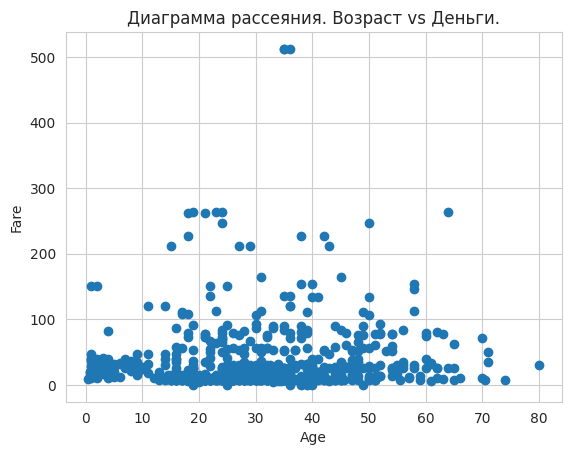

In [25]:
x = titanic_dataframe['Age']
y = titanic_dataframe['Fare']
plt.plot(x, y, 'o')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title("Диаграмма рассеяния. Возраст vs Деньги.")
plt.show()

<Axes: xlabel='Embarked', ylabel='Survived'>

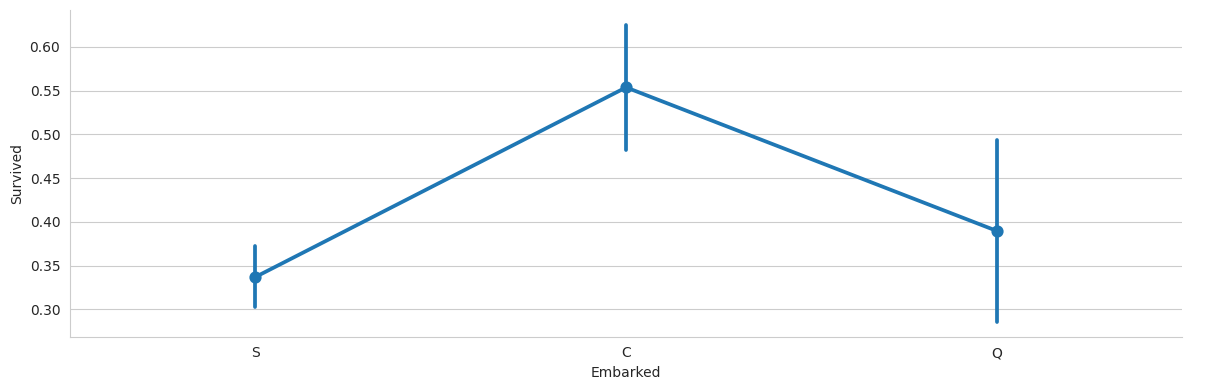

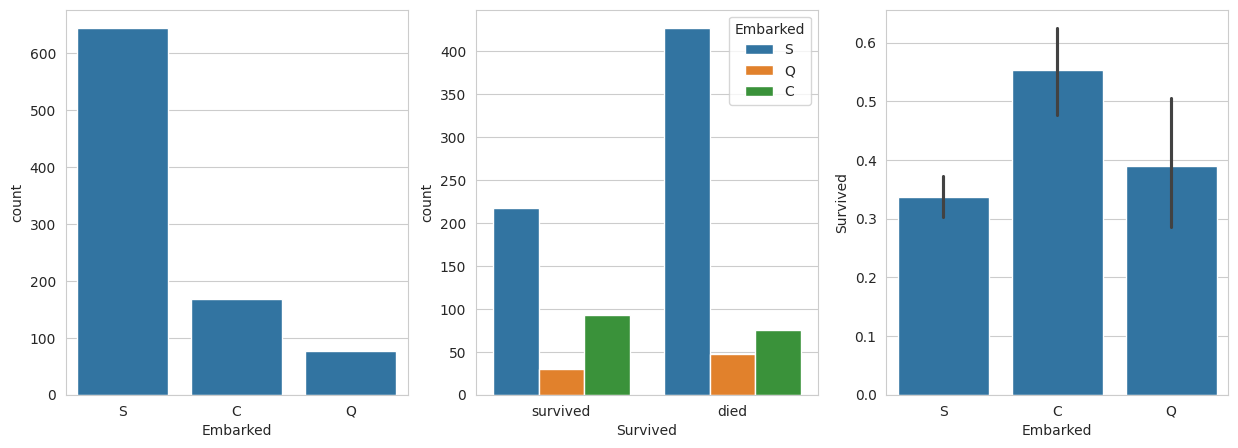

In [26]:
sns.catplot(x = 'Embarked', y = 'Survived', data=titanic_dataframe, height=4, aspect=3, kind = 'point')

figure_handle, (axis1, axis2, axis3) = plt.subplots(1, 3, figsize=(15, 5))

sns.countplot(x='Embarked', data=titanic_dataframe, ax=axis1)
sns.countplot(x='Survived', hue="Embarked", data=titanic_dataframe, order=[1, 0], ax=axis2)
axis2.set_xticks([0, 1], ["survived", "died"])

# group by embarked, and get the mean for survived passengers for each value in Embarked
sns.barplot(x='Embarked', y='Survived', data=titanic_dataframe[["Embarked", "Survived"]], order=['S','C','Q'], ax=axis3)

Стоит заметить что среди "C" доля выживших больше, т.е. возможно признак важный. Но вот как его обработать моделью? (если модель ожидает число?)
Давайте введём бинарные признаки для каждого категории. Один категориальный признак из N категорий превращается в N булевых признаков (а лучше N - 1). Чем меньше корреляции между пизнаками, тем лучше.

In [27]:
dummy_df = pd.get_dummies(titanic_dataframe['Embarked'])

dummy_df

,C,Q,S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
886,False,False,True
887,False,False,True
888,False,False,True
889,True,False,False


In [28]:
# Ниже реализуйте объединение двух таблиц dummy_df и titanic_dataframe

titanic_dataframe = titanic_dataframe.join(dummy_df)

titanic_dataframe = titanic_dataframe.drop(columns=["S", "Embarked"])

titanic_dataframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,C,Q
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,True,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,False,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,False,False


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,C,Q,Class_1,Class_2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,False,False,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,True,False,True,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,False,False,True,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,False,False,False,False


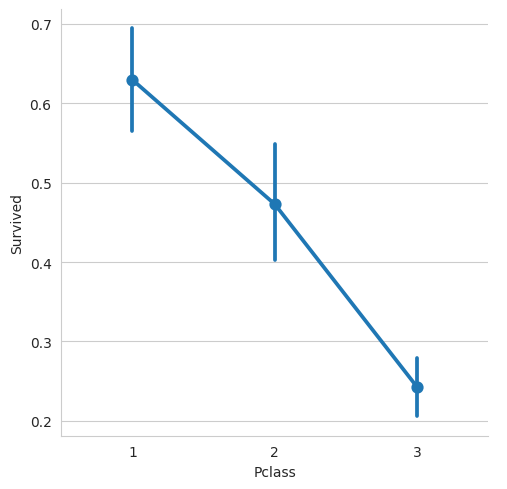

In [29]:
# Давайте глянем на влияние Pclass на выживание
sns.catplot(x = 'Pclass', y = 'Survived', order=[1, 2, 3], data=titanic_dataframe, height=5, kind = 'point')

# Давайте глянем на влияние Pclass на выживание

pclass_dummies_titanic  = pd.get_dummies(titanic_dataframe['Pclass']) # drop_first?
pclass_dummies_titanic.columns = ['Class_1', 'Class_2', 'Class_3']
pclass_dummies_titanic.drop(['Class_3'], axis=1, inplace=True)

titanic_dataframe = titanic_dataframe.join(pclass_dummies_titanic)
titanic_dataframe.head()

<Axes: title={'center': 'Распределение стоимости билетов'}, ylabel='Frequency'>

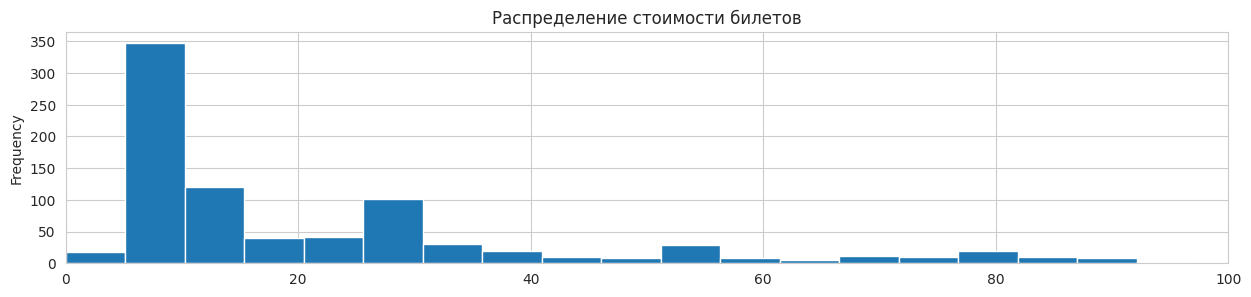

In [30]:
# Рассмотрим распределение цен на билеты

titanic_dataframe['Fare'] = titanic_dataframe['Fare'].astype(int)
titanic_dataframe['Fare'].plot(kind='hist', figsize=(15, 3), bins=100, xlim=(0, 100), title="Распределение стоимости билетов")


А как влияют деньги на выживание?

<ipython-input-31-e5c44bf04566>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Survived", y="Fare", data=titanic_dataframe, palette=["m", "g"], ax=ax)


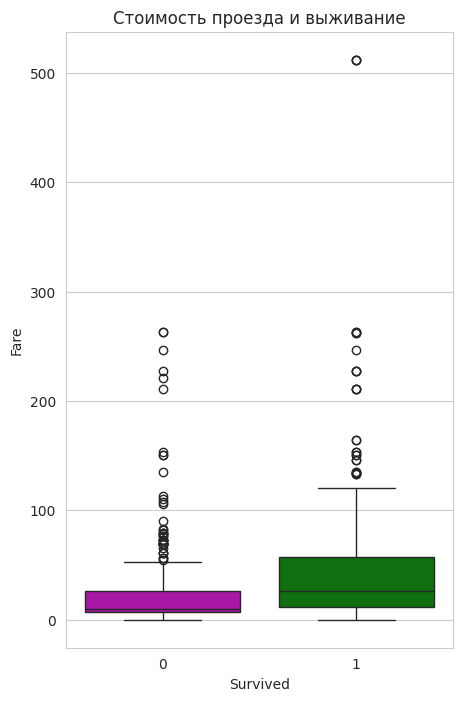

In [31]:
fig, ax = plt.subplots(figsize=(5,8))
sns.boxplot(x="Survived", y="Fare", data=titanic_dataframe, palette=["m", "g"], ax=ax)
ax.set_title("Стоимость проезда и выживание")
plt.show()


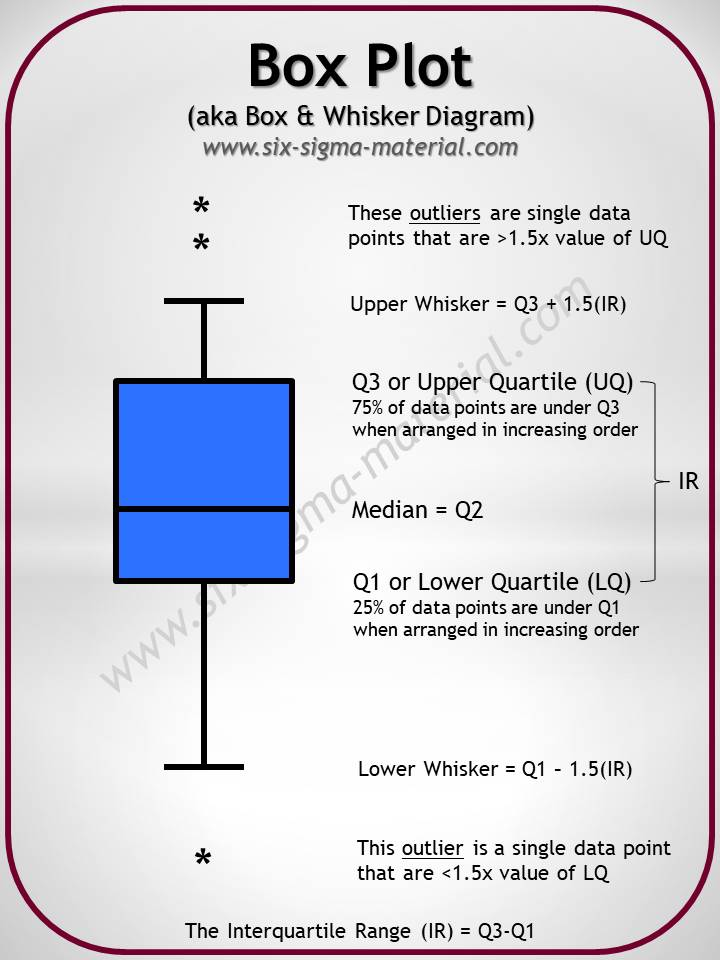

Давайте попробуем восстановить возраст так, чтобы не поменять сильно распределение. Как это лучше сделать?

Ниже представлен не самый лучший вариант.

<Axes: title={'center': 'New Age values - Titanic'}>

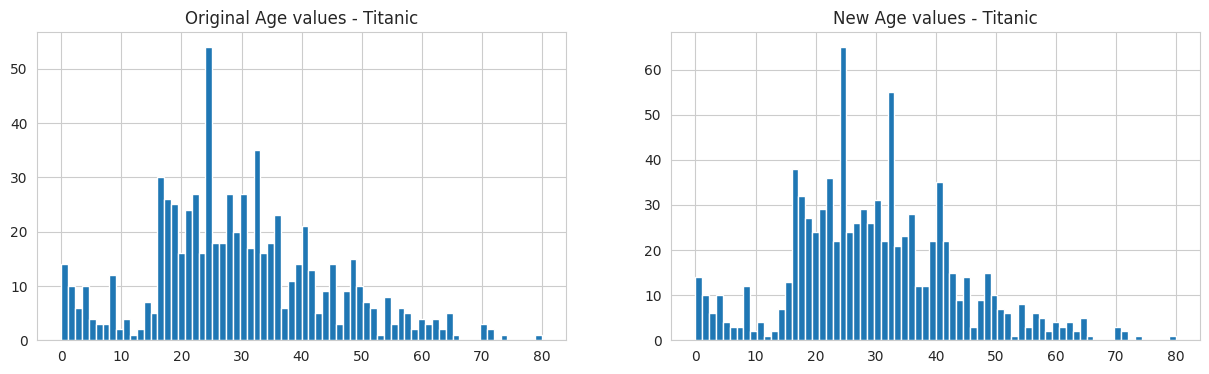

In [32]:
# Age
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(15, 4))
axis1.set_title('Original Age values - Titanic')
axis2.set_title('New Age values - Titanic')

# get average, std, and number of NaN values in titanic_df
average_age_titanic = titanic_dataframe["Age"].mean()
std_age_titanic = titanic_dataframe["Age"].std()
count_nan_age_titanic = titanic_dataframe["Age"].isnull().sum()

# generate random numbers between (mean - std) & (mean + std)
random_ages = np.random.randint(average_age_titanic - std_age_titanic,
                                average_age_titanic + std_age_titanic,
                                size=count_nan_age_titanic)

# plot original Age values
# NOTE: drop all null values, and convert to int
titanic_dataframe['Age'].dropna().astype(int).hist(bins=70, ax=axis1)

# fill NaN values in Age column with random values generated
titanic_dataframe.loc[np.isnan(titanic_dataframe["Age"]), "Age"] = random_ages

# convert from float to int
titanic_dataframe['Age'] = titanic_dataframe['Age'].astype(int)

# plot new Age Values
titanic_dataframe['Age'].hist(bins=70, ax=axis2)

Давайте узнаем кто из аудитории был бы в зоне риска (в соответствии с возрастом).

<Axes: xlabel='Age', ylabel='Survived'>

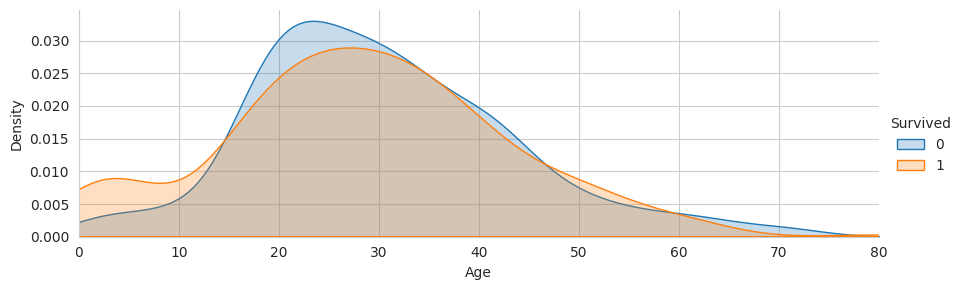

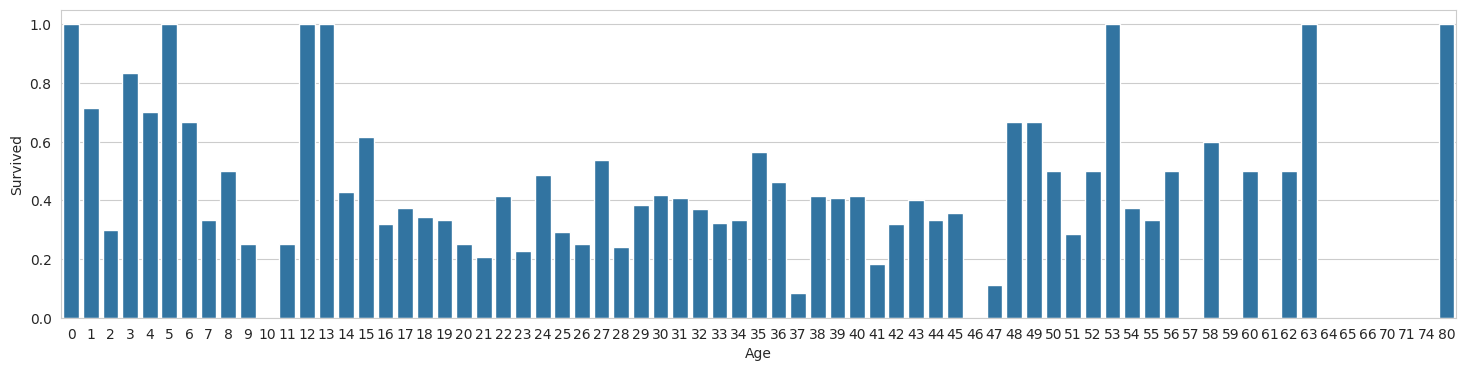

In [33]:
# peaks for survived/not survived passengers by their age
facet = sns.FacetGrid(titanic_dataframe, hue="Survived", aspect=3)
facet.map(sns.kdeplot, 'Age', fill=True)
facet.set(xlim=(0, titanic_dataframe['Age'].max()))
facet.add_legend()

# average survived passengers by age
figure_handle, axis1 = plt.subplots(1, 1, figsize=(18, 4))
average_age = titanic_dataframe[["Age", "Survived"]].groupby(['Age'], as_index=False).mean()
sns.barplot(x='Age', y='Survived', data=average_age)

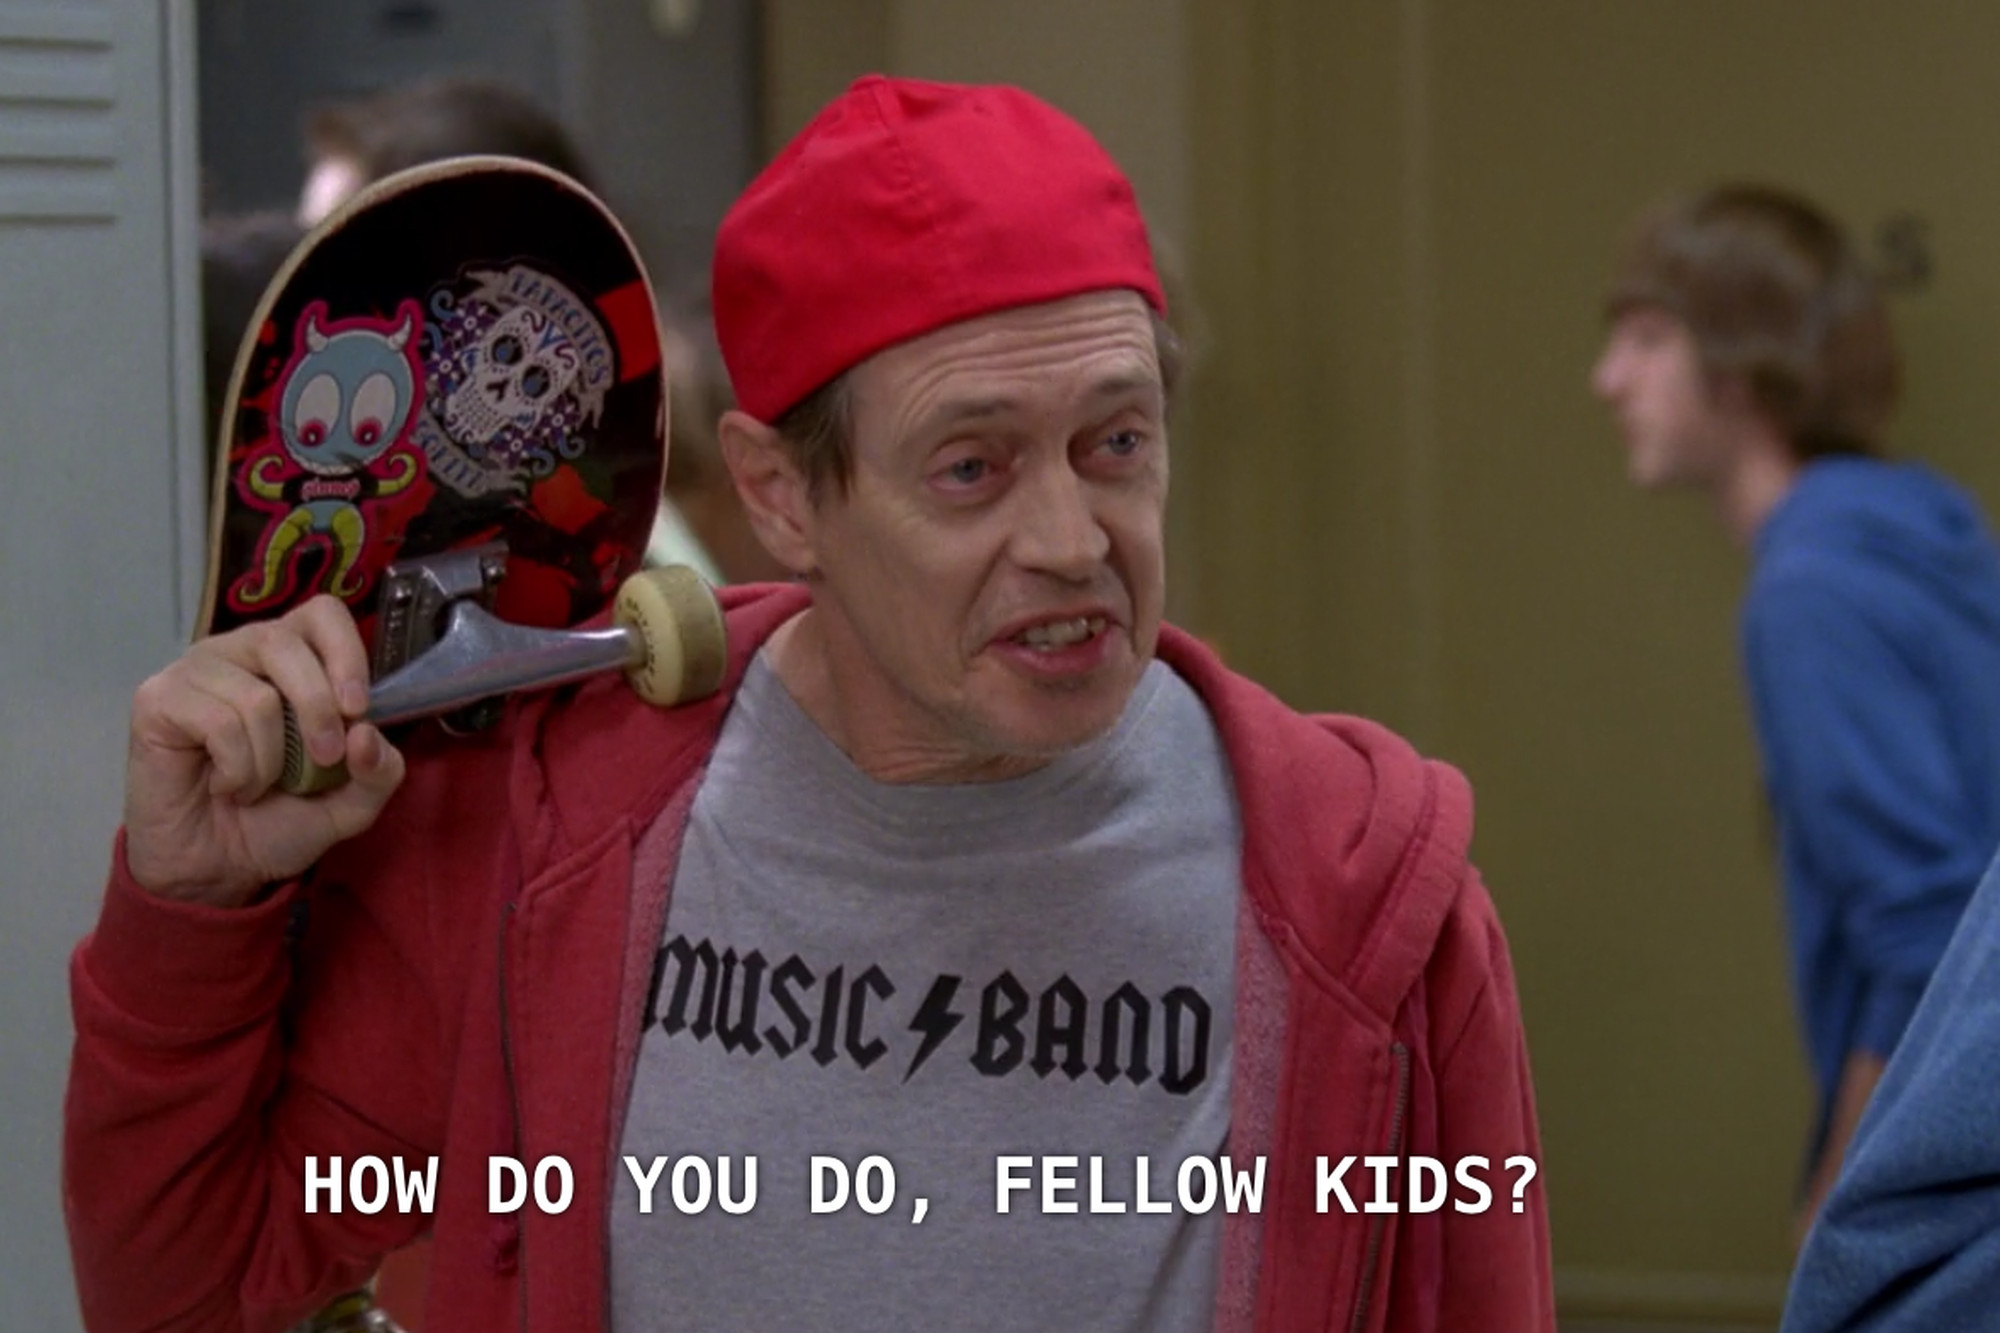

Давайте добавим признак (это уже серьезный feature engineering) наличия родственника на борту.

In [34]:
# Instead of having two columns Parch & SibSp,
# we can have only one column that represents if a passenger had any family member aboard or not,
# Meaning, if having any family member (whether parent, brother, ...etc) increases chances of Survival or not.
titanic_dataframe['Family'] = titanic_dataframe["Parch"] + titanic_dataframe["SibSp"]
titanic_dataframe.loc[titanic_dataframe['Family'] > 0, 'Family'] = 1
titanic_dataframe.loc[titanic_dataframe['Family'] == 0, 'Family'] = 0

# drop Parch & SibSp
titanic_dataframe.drop(['SibSp','Parch'], axis=1, inplace=True)

Сколько людей с семьей и без. У кого шанс выжить больше (с семьей или нет)? Постройте графики.

<ipython-input-35-49f51f3032d2>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis1.set_xticklabels(["With Family", "Alone"], rotation=0)


<Axes: xlabel='Family', ylabel='Survived'>

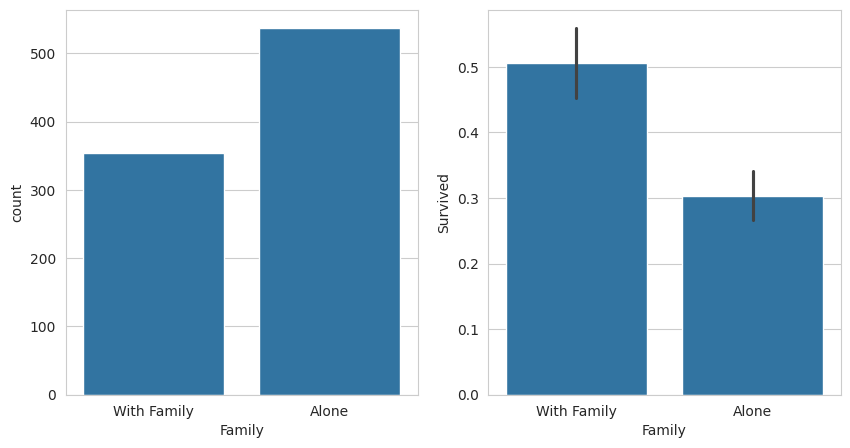

In [35]:
# plot Family
figure_handle, (axis1, axis2) = plt.subplots(1, 2, sharex=True, figsize=(10, 5))

sns.countplot(x='Family', data=titanic_dataframe, order=[1, 0], ax=axis1)
axis1.set_xticklabels(["With Family", "Alone"], rotation=0)

# average of survived for those who had/didn't have any family member
sns.barplot(x='Family', y='Survived', data=titanic_dataframe[["Family", "Survived"]], order=[1, 0], ax=axis2)

Так как у детей достаточно высокие шансы на выживание давайте добавим новую категорию. Но чтобы не увеличивать число признаков, давайте добавим категорию к признаку `Sex` так, чтобы было три категории ['Child', 'Female', 'Male']. Ребенком считаем людей младше 16.

Среди какой их трех категорий выше шансы на выживание? (постройте графики)

Преобразуйте категориальный признак в бинарные по аналогии с предыдущими.

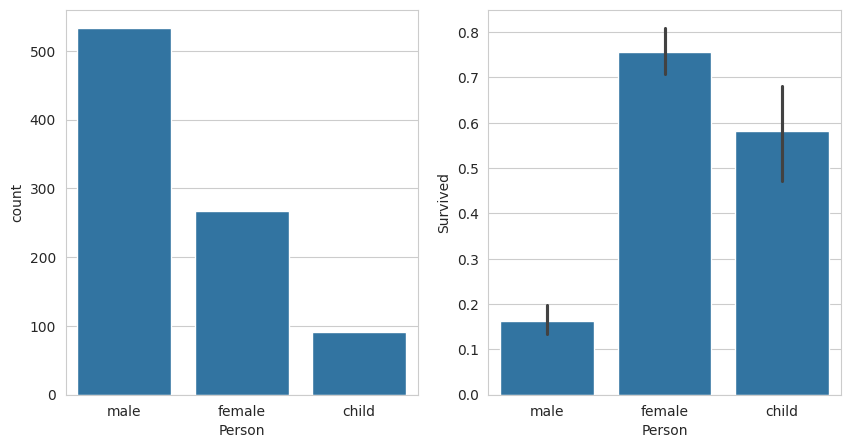

In [36]:
# Sex variable

# As we see, children(age < ~16) on aboard seem to have a high chances for Survival.
# So, we can classify passengers as males, females, and child
def get_person(passenger):
    age, sex = passenger
    return 'child' if age < 16 else sex

titanic_dataframe['Person'] = titanic_dataframe[['Age','Sex']].apply(get_person, axis=1)

# No need to use Sex column since we created Person column
#titanic_dataframe.drop(['Sex'], axis=1, inplace=True)

# create dummy variables for Person column, & drop Male as it has the lowest average of survived passengers
person_dummies_titanic = pd.get_dummies(titanic_dataframe['Person'])
person_dummies_titanic.columns = ['Child', 'Female', 'Male']
person_dummies_titanic.drop(['Male'], axis=1, inplace=True)

titanic_dataframe = titanic_dataframe.join(person_dummies_titanic)

figure_handle, (axis1, axis2) = plt.subplots(1, 2, figsize=(10, 5))

sns.countplot(x='Person', data=titanic_dataframe, ax=axis1)

# average of survived for each Person(male, female, or child)
sns.barplot(x='Person', y='Survived', data=titanic_dataframe[["Person", "Survived"]],
            ax=axis2, order=['male', 'female', 'child'])

# we don't need person and sex variable after introduction of the corresponding dummy variables
titanic_dataframe.drop(['Person'], axis=1, inplace=True)
titanic_dataframe.drop('Sex', axis=1, inplace=True)

In [37]:
titanic_dataframe.head()

,PassengerId,Survived,Pclass,Name,Age,Ticket,Fare,Cabin,C,Q,Class_1,Class_2,Family,Child,Female
0,1,0,3,"Braund, Mr. Owen Harris",22,A/5 21171,7,NaN,False,False,False,False,1,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38,PC 17599,71,C85,True,False,True,False,1,False,True
2,3,1,3,"Heikkinen, Miss. Laina",26,STON/O2. 3101282,7,NaN,False,False,False,False,0,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,113803,53,C123,False,False,True,False,1,False,True
4,5,0,3,"Allen, Mr. William Henry",35,373450,8,NaN,False,False,False,False,0,False,False


In [43]:
titanic_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    int64 
 1   Survived     891 non-null    int64 
 2   Pclass       891 non-null    int64 
 3   Name         891 non-null    object
 4   Age          891 non-null    int64 
 5   Ticket       891 non-null    object
 6   Fare         891 non-null    int64 
 7   Cabin        204 non-null    object
 8   C            891 non-null    bool  
 9   Q            891 non-null    bool  
 10  Class_1      891 non-null    bool  
 11  Class_2      891 non-null    bool  
 12  Family       891 non-null    int64 
 13  Child        891 non-null    bool  
 14  Female       891 non-null    bool  
dtypes: bool(6), int64(6), object(3)
memory usage: 68.0+ KB


Задачи:

1. Сравните распределения возраста у мужчин и женщин, детей. Постройте графики.

Text(0.5, 1.0, 'Age_hist for children')

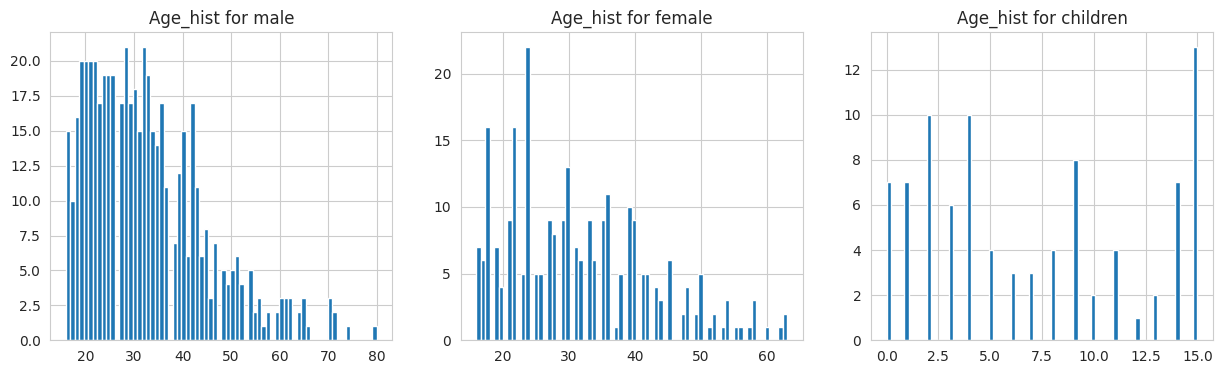

In [44]:
# Ваш код здесь.
male_titanic = titanic_dataframe[(titanic_dataframe['Child'] == False) & (titanic_dataframe['Female'] == False)]
female_titanic = titanic_dataframe[titanic_dataframe['Female'] == True]
child_titanic = titanic_dataframe[titanic_dataframe['Child'] == True]

fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize = (15,4))

male_titanic['Age'].hist(ax = axis1, bins = 70)
female_titanic['Age'].hist(ax = axis2, bins = 70)
child_titanic['Age'].hist(ax = axis3, bins = 70)

axis1.set_title("Age_hist for male")
axis2.set_title("Age_hist for female")
axis3.set_title("Age_hist for children")


# Машинное обучение

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, f1_score, roc_curve, auc   # хорошая ли метрика выбрана?

In [46]:
titanic_dataframe.head()

,PassengerId,Survived,Pclass,Name,Age,Ticket,Fare,Cabin,C,Q,Class_1,Class_2,Family,Child,Female
0,1,0,3,"Braund, Mr. Owen Harris",22,A/5 21171,7,NaN,False,False,False,False,1,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38,PC 17599,71,C85,True,False,True,False,1,False,True
2,3,1,3,"Heikkinen, Miss. Laina",26,STON/O2. 3101282,7,NaN,False,False,False,False,0,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,113803,53,C123,False,False,True,False,1,False,True
4,5,0,3,"Allen, Mr. William Henry",35,373450,8,NaN,False,False,False,False,0,False,False


Какие признаки стоит убрать перед началом обучения?

In [47]:
titanic_dataframe.drop(columns=["Name", "PassengerId", "Ticket", "Cabin"], inplace=True)
titanic_dataframe.columns

Index(['Survived', 'Pclass', 'Age', 'Fare', 'C', 'Q', 'Class_1', 'Class_2',
       'Family', 'Child', 'Female'],
      dtype='object')

In [48]:
train, test = train_test_split(titanic_dataframe, train_size=0.5, test_size=0.5)

При таком разбиении на трейн и тест не произошла ли у нас утечка данных из теста в трейн? Давайте вспомним весь наш feature engineering.

In [49]:
train_x = train.drop(['Survived'], axis=1)
train_y = train['Survived']
test_x = test.drop(['Survived'], axis=1)
test_y = test['Survived']

In [54]:
# Logistic Regression

logistic_regression_model = LogisticRegression(solver='liblinear')
logistic_regression_model.fit(train_x, train_y)
train_prediction = logistic_regression_model.predict(train_x)
test_prediction = logistic_regression_model.predict(test_x)
train_accuracy = accuracy_score(train_y, train_prediction)
test_accuracy = accuracy_score(test_y, test_prediction)

print('Train Accuracy:', train_accuracy)
print('Test Accuracy:', test_accuracy)
print(classification_report(test_y, test_prediction, digits = 4))

Train Accuracy: 0.8157303370786517
Test Accuracy: 0.8116591928251121
              precision    recall  f1-score   support

           0     0.8259    0.8800    0.8521       275
           1     0.7843    0.7018    0.7407       171

    accuracy                         0.8117       446
   macro avg     0.8051    0.7909    0.7964       446
weighted avg     0.8100    0.8117    0.8094       446



AUC:	0.8529186602870813


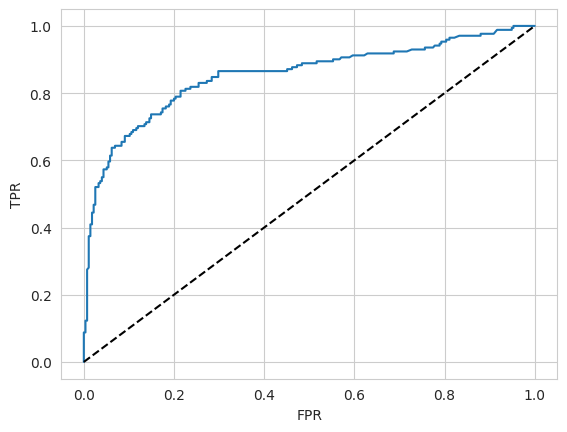

In [56]:
test_predictions_proba = logistic_regression_model.predict_proba(test_x)[:,1]
fpr, tpr, _ = roc_curve(test_y, test_predictions_proba)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr, tpr)
plt.plot((0,1), ls = 'dashed', color = 'black')
print(f"AUC:\t{auc(fpr, tpr)}")

Давайте посмотрим на самые важные признкаи по мнению модели.

А можем ли мы сравнить "важность", используя полученные коэффициенты, или где-то есть подвох?

In [57]:
# get Correlation Coefficient for each feature using Logistic Regression
coeff_df = pd.DataFrame(titanic_dataframe.columns.delete(0))
coeff_df.columns = ['Features']
coeff_df["Coefficient Estimate"] = pd.Series(logistic_regression_model.coef_[0])

# preview
coeff_df

,Features,Coefficient Estimate
0,Pclass,-0.756278
1,Age,-0.022796
2,Fare,0.001284
3,C,0.772564
4,Q,0.279158
5,Class_1,0.634139
6,Class_2,0.512825
7,Family,-0.131999
8,Child,1.642171
9,Female,2.639016


In [60]:
# Random Forests

random_forest_model = RandomForestClassifier(n_estimators=10)
random_forest_model.fit(train_x, train_y)
train_prediction = random_forest_model.predict(train_x)
test_prediction = random_forest_model.predict(test_x)
train_accuracy = accuracy_score(train_y, train_prediction)
test_accuracy = accuracy_score(test_y, test_prediction)

print('Train Accuracy:', train_accuracy)
print('Test Accuracy:', test_accuracy)
print(classification_report(test_y, test_prediction, digits = 4))

Train Accuracy: 0.9662921348314607
Test Accuracy: 0.7802690582959642
              precision    recall  f1-score   support

           0     0.7902    0.8764    0.8310       275
           1     0.7589    0.6257    0.6859       171

    accuracy                         0.7803       446
   macro avg     0.7745    0.7510    0.7585       446
weighted avg     0.7782    0.7803    0.7754       446



AUC:	0.8118766613503456


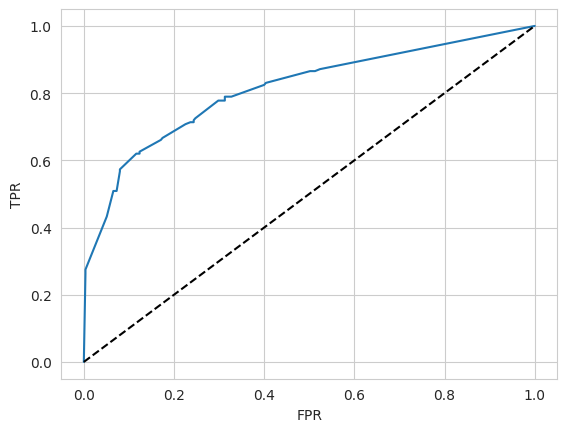

In [61]:
test_predictions_proba = random_forest_model.predict_proba(test_x)[:,1]
fpr, tpr, _ = roc_curve(test_y, test_predictions_proba)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr, tpr)
plt.plot((0,1), ls = 'dashed', color = 'black')
print(f"AUC:\t{auc(fpr, tpr)}")

In [62]:
# K nearest neighbours

knn_model = KNeighborsClassifier(n_neighbors=1, weights="distance")
knn_model.fit(train_x, train_y)
train_prediction = knn_model.predict(train_x)
test_prediction = knn_model.predict(test_x)
train_accuracy = accuracy_score(train_y, train_prediction)
test_accuracy = accuracy_score(test_y, test_prediction)

print('Train Accuracy:', train_accuracy)
print('Test Accuracy:', test_accuracy)
print(classification_report(test_y, test_prediction, digits = 4))

Train Accuracy: 0.9775280898876404
Test Accuracy: 0.6659192825112108
              precision    recall  f1-score   support

           0     0.7203    0.7491    0.7344       275
           1     0.5687    0.5322    0.5498       171

    accuracy                         0.6659       446
   macro avg     0.6445    0.6406    0.6421       446
weighted avg     0.6622    0.6659    0.6636       446



AUC:	0.6406273258904838


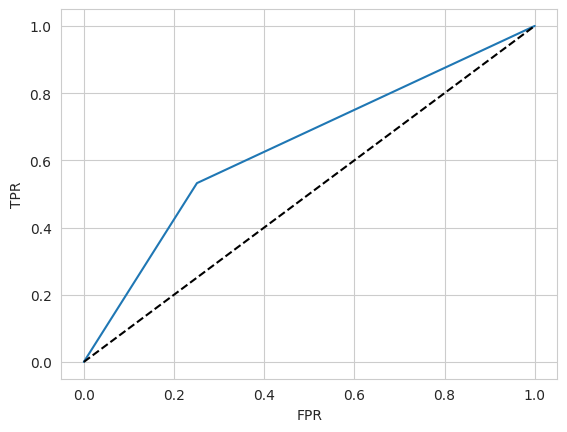

In [63]:
test_predictions_proba = knn_model.predict_proba(test_x)[:,1]
fpr, tpr, _ = roc_curve(test_y, test_predictions_proba)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr, tpr)
plt.plot((0,1), ls = 'dashed', color = 'black')
print(f"AUC:\t{auc(fpr, tpr)}")

Про какую модель можно сказать, что она переобучилась больше остальных? Про KNN

Задача: подкрутите гиперпараметры для "сааамой больной в мире" модели, так чтобы стало лучше, ну или прям сильно хуже :)


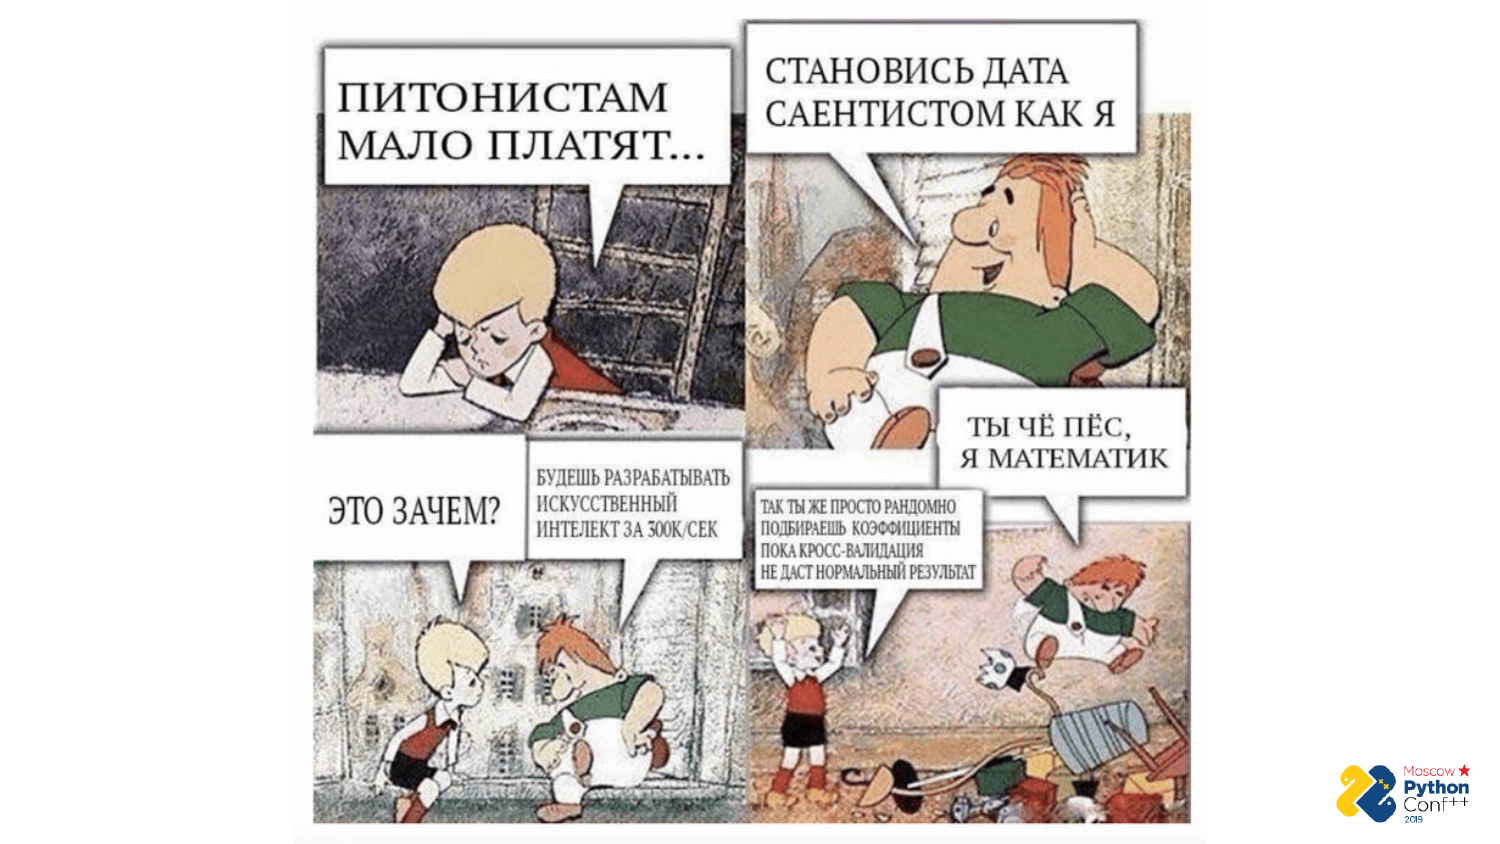

In [65]:
X = titanic_dataframe.drop('Survived', axis = 1)
y = titanic_dataframe['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    shuffle = True,
                                                    random_state = 2024)
all_k = [1, 3, 10, 30, 40, 60]
acc_test = []
acc_train = []

for k in all_k:
  clf = KNeighborsClassifier(n_neighbors= k ).fit(X_train, y_train)
  acc_test.append(accuracy_score(y_test, clf.predict(X_test)))
  acc_train.append(accuracy_score(y_train, clf.predict(X_train)))
pd.DataFrame({'k': all_k,
              'acc_test': acc_test,
              'acc_train' : acc_train})


,k,acc_test,acc_train
0,1,0.636872,0.971910
1,3,0.642458,0.821629
2,10,0.681564,0.716292
3,30,0.687151,0.696629
4,40,0.670391,0.700843
5,60,0.687151,0.685393


In [67]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

acc_test = []
acc_train = []

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

for k in all_k:
  clf = KNeighborsClassifier(n_neighbors= k ).fit(X_train_scaled, y_train)
  acc_test.append(accuracy_score(y_test, clf.predict(X_test_scaled)))
  acc_train.append(accuracy_score(y_train, clf.predict(X_train_scaled)))
pd.DataFrame({'k': all_k,
              'acc_test': acc_test,
              'acc_train' : acc_train})


,k,acc_test,acc_train
0,1,0.681564,0.973315
1,3,0.770950,0.877809
2,10,0.798883,0.816011
3,30,0.810056,0.811798
4,40,0.804469,0.792135
5,60,0.770950,0.783708


In [86]:
acc_test = []
acc_train = []
all_k_1 = range(1,60, 1)
for k in all_k_1:
  clf = KNeighborsClassifier(n_neighbors= k, metric = 'minkowski', p = 2).fit(X_train_scaled, y_train)
  acc_test.append(accuracy_score(y_test, clf.predict(X_test_scaled)))
  acc_train.append(accuracy_score(y_train, clf.predict(X_train_scaled)))
pd.DataFrame({'k': all_k_1,
              'acc_test': acc_test,
              'acc_train' : acc_train})["acc_test"].max()

0.8268156424581006

In [72]:
for h in np.arange(0.02, 0.1, 0.01):
  def gaussian_kernel(distances, h=h):
       return np.exp(- distances**2 / h**2)
  acc_test = []
  acc_train = []
  for k in all_k:
    clf = KNeighborsClassifier(n_neighbors= k, weights=gaussian_kernel).fit(X_train_scaled, y_train)
    acc_test.append(accuracy_score(y_test, clf.predict(X_test_scaled)))
    acc_train.append(accuracy_score(y_train, clf.predict(X_train_scaled)))
  print(f"h ={h} \n",pd.DataFrame({'k': all_k,
              'acc_test': acc_test,
              'acc_train' : acc_train}))


h =0.02 
     k  acc_test  acc_train
0   1  0.648045   0.971910
1   3  0.653631   0.976124
2  10  0.653631   0.976124
3  30  0.653631   0.976124
4  40  0.653631   0.976124
5  60  0.653631   0.976124
h =0.03 
     k  acc_test  acc_train
0   1  0.648045   0.971910
1   3  0.653631   0.976124
2  10  0.653631   0.976124
3  30  0.653631   0.976124
4  40  0.653631   0.976124
5  60  0.653631   0.976124
h =0.039999999999999994 
     k  acc_test  acc_train
0   1  0.631285   0.971910
1   3  0.636872   0.976124
2  10  0.636872   0.976124
3  30  0.636872   0.976124
4  40  0.636872   0.976124
5  60  0.636872   0.976124
h =0.049999999999999996 
     k  acc_test  acc_train
0   1  0.631285   0.971910
1   3  0.636872   0.976124
2  10  0.636872   0.976124
3  30  0.636872   0.976124
4  40  0.636872   0.976124
5  60  0.636872   0.976124
h =0.06 
     k  acc_test  acc_train
0   1  0.620112   0.971910
1   3  0.631285   0.976124
2  10  0.631285   0.976124
3  30  0.631285   0.976124
4  40  0.631285   0.976124


Итог максимально получилось получить 0.8268156424581006

In [ ]:
# Ваши подборы здесь
# Если есть желание, то постройте график зависимости метрик, от используемых гиперпараметров

# Ответ:
# Хуже всех k nearest neighbours.
# Можно посмотреть число соседей, расстояние. Но скорее всего ничего не получится сильно изменить.
# А вот если убрать признаки типа Fare (убрал первые 3 и стало лучше), которые мы не скейлили, то будет лучше.

А давайте начнем всё заново. Получим ли мы те же результаты, что нам нужно сделать, чтобы наши эксперименты были воспроизводимыми?


In [ ]:
# - фиксировать окружение, в котором работаем.
# - запускать клетки последовательно сверху-вниз, а лучше переписывать всё в скрипты и хранить на гите
# - фиксировать seed у всех библиотек, которые работают с псевдо-случайными числами.
# - использовать детерминированные алгоритмы.
# - сохрянять промежуточные чекпоинты (например, pickle-ить)

Данный ноутбук подготовлен с использованием материалов из:

- https://github.com/adasegroup/ML2024_seminars